## Library Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set()

In [2]:
if not os.path.exists('../../Graphs/visualization/'):
    os.makedirs('../../Graphs/visualization/')

## Importing Baltimore calls for service dataset

In [3]:
data = pd.read_csv('../../Clean Dataset/BPD_Part_1_Victim_Based_Crime_Data.csv')
data.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,06/06/2020,15:32:00,4E,800 RICHWOOD AVE,COMMON ASSAULT,I,NaN,524,NORTHERN,RICHNOR SPRINGS,-76.604920,39.346381,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1,06/06/2020,09:16:00,5C,6000 AMBERWOOD RD,BURGLARY,I,NaN,443,NORTHEAST,FRANKFORD,-76.543350,39.316302,NaN,APT/CONDO - OCCUPIED,NaN,1
2,06/06/2020,13:23:00,6G,1100 ORLEANS ST,LARCENY,I,NaN,211,EASTERN,PLEASENT VIEW GARDENS,-76.602911,39.294721,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,06/06/2020,08:35:00,6G,2700 BERYL AVE,LARCENY,I,NaN,333,EASTERN,BIDDLE STREET,-76.579613,39.303053,NaN,OTHER/RESIDENTIAL,Eastern 2,1
4,06/06/2020,08:35:00,6G,2700 BERYL AVE,LARCENY,I,NaN,333,EASTERN,BIDDLE STREET,-76.579613,39.303053,NaN,OTHER/RESIDENTIAL,Eastern 2,1


In [4]:
data.describe()

,Longitude,Latitude,Location 1,Total Incidents
count,292522.000000,292522.000000,0.0,293687.0
mean,-76.617597,39.306884,NaN,1.0
std,0.043687,0.029655,NaN,0.0
min,-81.529189,37.577262,NaN,1.0
25%,-76.649274,39.288340,NaN,1.0
50%,-76.614162,39.303115,NaN,1.0
75%,-76.587114,39.327111,NaN,1.0
max,-76.383228,39.661332,NaN,1.0


In [5]:
columns_in_use = ['CrimeDate', 'District']
columns_in_use

['CrimeDate', 'District']

In [6]:
data = data[columns_in_use]
data.head()

,CrimeDate,District
0,06/06/2020,NORTHERN
1,06/06/2020,NORTHEAST
2,06/06/2020,EASTERN
3,06/06/2020,EASTERN
4,06/06/2020,EASTERN


In [7]:
data.describe()

,CrimeDate,District
count,293687,293687
unique,2418,10
top,04/27/2015,NORTHEAST
freq,389,44236


In [8]:
null_count = 0

for i in columns_in_use:
    rows_with_null_values = data[data[i].isnull()].index
    print ('Number of Rows with null values in Column %s = %s'%(i, len(rows_with_null_values)))
    data = data.drop(rows_with_null_values, axis = 0)
    null_count += len(rows_with_null_values)

print ('Number of rows droped = ', null_count)
print ('Number of rows after droping null values = ', data.shape[0])
print ('Data Frame Shape: \n\t Number of Rows = %s \n\t Number of Columns = %s '%(data.shape[0], data.shape[1]))

Number of Rows with null values in Column CrimeDate = 0
Number of Rows with null values in Column District = 0
Number of rows droped =  0
Number of rows after droping null values =  293687
Data Frame Shape: 
	 Number of Rows = 293687 
	 Number of Columns = 2 


## Droping Rows with Unknown Police Districts

In [9]:
rows_with_unknowon_district = data[data['District'] == 'UNKNOWN'].index
print ('Number of Rows with null values in Column %s = %s'%(i, len(rows_with_unknowon_district)))
data = data.drop(rows_with_unknowon_district, axis = 0)

null_count += len(rows_with_unknowon_district)
print ('Number of rows droped = ', null_count)
print ('Number of rows after droping null values = ', data.shape[0])
print ('Data Frame Shape: \n\t Number of Rows = %s \n\t Number of Columns = %s '%(data.shape[0], data.shape[1]))

Number of Rows with null values in Column District = 337
Number of rows droped =  337
Number of rows after droping null values =  293350
Data Frame Shape: 
	 Number of Rows = 293350 
	 Number of Columns = 2 


In [10]:
data['CrimeDate']  = pd.to_datetime(data['CrimeDate'])
data.head()

,CrimeDate,District
0,2020-06-06,NORTHERN
1,2020-06-06,NORTHEAST
2,2020-06-06,EASTERN
3,2020-06-06,EASTERN
4,2020-06-06,EASTERN


## Creating Different Time features

In [11]:
day_of_week = data['CrimeDate'].dt.dayofweek
week = data['CrimeDate'].dt.week
month = data['CrimeDate'].dt.month
year = data['CrimeDate'].dt.year

data['Day'] = day_of_week
data['Week'] = week
data['Month'] = month
data['Year'] = year

data.head()

,CrimeDate,District,Day,Week,Month,Year
0,2020-06-06,NORTHERN,5,23,6,2020
1,2020-06-06,NORTHEAST,5,23,6,2020
2,2020-06-06,EASTERN,5,23,6,2020
3,2020-06-06,EASTERN,5,23,6,2020
4,2020-06-06,EASTERN,5,23,6,2020


## Consider data from 2014 and beyond

In [12]:
data = data[data['Year']>= 2014]

In [13]:
data.describe()

,Day,Week,Month,Year
count,293270.000000,293270.000000,293270.000000,293270.000000
mean,2.957531,26.589849,6.514482,2016.687350
std,1.989160,14.788523,3.392183,1.805081
min,0.000000,1.000000,1.000000,2014.000000
25%,1.000000,14.000000,4.000000,2015.000000
50%,3.000000,26.000000,7.000000,2017.000000
75%,5.000000,39.000000,9.000000,2018.000000
max,6.000000,53.000000,12.000000,2020.000000


## Creating Times Series Dataset

In [14]:
def ts_data_creation(group_by_parameter, data):
    if group_by_parameter == 'Week' or group_by_parameter == 'Month':
        pass
    else:
        raise AttributeError('group_by_parameter')
    
    if group_by_parameter == 'Week':
        parameter_name = 'Week_Number'
    else:
        parameter_name = 'Month_Number'
        
    PoliceDistricts = set(data['District'])
    ts_data = {}
    for district in PoliceDistricts:
        ts_data_temp = []
        for year_num, year_value in data[data['District'] == district].groupby('Year'):
            for parameter_num, parameter_value in year_value[year_value['District'] == district].groupby(group_by_parameter):
                total_crimes = len(parameter_value)
                year_parameter_num = "%s_%s"%(year_num, parameter_num)
                ts_data_temp.append([year_num] + [district, parameter_num, year_parameter_num] + [total_crimes])
        ts_data_temp = pd.DataFrame(ts_data_temp, columns = ['Year', 'PoliceDistrict', parameter_name, 'Year_%s'%parameter_name, 'NoOfCrimes'])
        ts_data[district] = ts_data_temp
    
    return ts_data

In [15]:
ts_data_week = ts_data_creation('Week', data)
ts_data_week

{'SOUTHEAST':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014      SOUTHEAST            1           2014_1         133
 1    2014      SOUTHEAST            2           2014_2         113
 2    2014      SOUTHEAST            3           2014_3         125
 3    2014      SOUTHEAST            4           2014_4         114
 4    2014      SOUTHEAST            5           2014_5         140
 ..    ...            ...          ...              ...         ...
 332  2020      SOUTHEAST           19          2020_19          65
 333  2020      SOUTHEAST           20          2020_20          99
 334  2020      SOUTHEAST           21          2020_21          85
 335  2020      SOUTHEAST           22          2020_22          69
 336  2020      SOUTHEAST           23          2020_23          35
 
 [337 rows x 5 columns],
 'NORTHERN':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014       NORTHERN            1           2014_1         

## Importing Population Dataset

In [16]:
population_data = pd.read_csv('../../Clean Dataset/Population_By_PoliceDistrict.csv')
population_data

,Police District,Population
0,CENTRAL,34300
1,NORTHERN,95194
2,NORTHWEST,78736
3,WESTERN,39691
4,EASTERN,42653
5,NORTHEAST,155040
6,SOUTHEAST,69535
7,SOUTHERN,60141
8,SOUTHWEST,68743


### Using Population as a Scale
Our goal is to find number of crimes in a police district per 10,000 people

In [17]:
districts = data['District'].unique()
for district in districts:
    number_of_people = population_data[population_data['Police District'] == district]['Population'].values[0]
    crime_per_10k = ts_data_week[district]['NoOfCrimes'] / number_of_people * 10000
    ts_data_week[district]['NoOfCrimes'] = crime_per_10k.round(0).astype(int)
ts_data_week

{'SOUTHEAST':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014      SOUTHEAST            1           2014_1          19
 1    2014      SOUTHEAST            2           2014_2          16
 2    2014      SOUTHEAST            3           2014_3          18
 3    2014      SOUTHEAST            4           2014_4          16
 4    2014      SOUTHEAST            5           2014_5          20
 ..    ...            ...          ...              ...         ...
 332  2020      SOUTHEAST           19          2020_19           9
 333  2020      SOUTHEAST           20          2020_20          14
 334  2020      SOUTHEAST           21          2020_21          12
 335  2020      SOUTHEAST           22          2020_22          10
 336  2020      SOUTHEAST           23          2020_23           5
 
 [337 rows x 5 columns],
 'NORTHERN':      Year PoliceDistrict  Week_Number Year_Week_Number  NoOfCrimes
 0    2014       NORTHERN            1           2014_1         

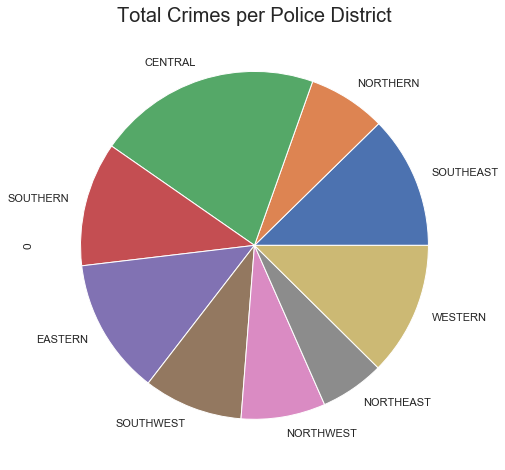

In [22]:
crime_dict = {}

for dist in ts_data_week:
    crime_dict[dist] = ts_data_week[dist]['NoOfCrimes'].sum()
crime_df = pd.DataFrame(crime_dict, index = range(len(ts_data_week))).iloc[0].T
crime_df.plot.pie(figsize=(15, 8))
plt.title('Total Crimes per Police District', fontsize=20)
plt.savefig('../../Graphs/visualization/total_crimes_per_police_district.jpg')

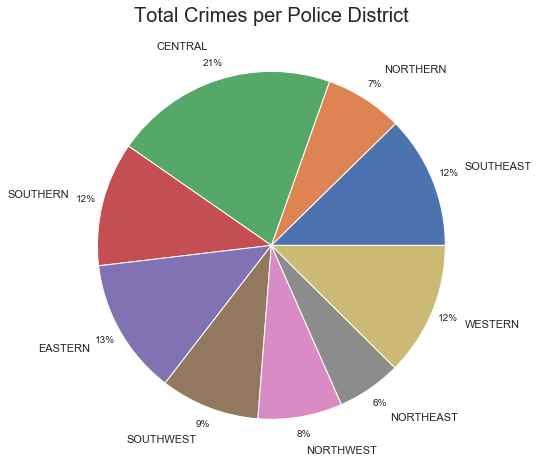

In [36]:
import matplotlib.pyplot as plt 
df = crime_df.to_frame()
fig = plt.figure(figsize=(15, 8))
plt.pie(df[0], labels=df.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Total Crimes per Police District', fontsize=20)
plt.savefig('../../Graphs/visualization/total_percentage_crimes_per_police_district.jpg')